This implementation is a Tensorflow 2.0 variation of the following tutorial https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

In [1]:
import tensorflow as tf
from tqdm import tqdm
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data[:, :2]
labels = (iris.target != 0) * 1
features = np.array(features,dtype='float32')
labels = np.array(labels,dtype='float32')

In [4]:
input_dim = features.shape[1]

learning_rate = 0.1

tf.random.set_seed(42)
# This is our weight matrix
w = tf.Variable(tf.zeros(shape=(input_dim, )))

def predict_probs(x):
    return sigmoid(tf.tensordot(x,w, 1))

def predict(X, threshold=0.5):
    return tf.where(predict_probs(X) >= threshold, 1, 0)
    #return predict_probs(X) >= threshold

def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x)) # computing the sigmoid value of x

def compute_cost(x, y):
    # computing the loss function
    h_z = predict_probs(x)
    cost = -y * tf.math.log(h_z) - (1 - y) * tf.math.log(1 - h_z) # computing the cost function
    return tf.reduce_mean(cost)

@tf.function
def fit(x, y):
    with tf.GradientTape() as tape:
        loss = compute_cost(x, y)
        # We don't need to actually compute the derivative, the tensorflow does that for us!
        dloss_dw = tape.gradient(loss, w)
    w.assign_sub(learning_rate * dloss_dw)
    return loss

In [5]:
# shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

losses = []
for epoch in tqdm(range(1000)):
    epoch_losses = []
    for step, (x, y) in enumerate(dataset):
        loss = fit(x, y)
        epoch_losses.append(loss)
    losses.append(np.mean(epoch_losses))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 177.38it/s]


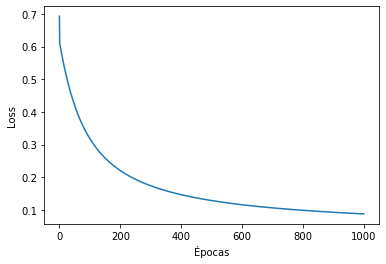

In [6]:
plt.plot(range(len(losses)), losses)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.show()

In [7]:
from sklearn.metrics import accuracy_score
y_pred = predict(features, 0.5)

In [8]:
accuracy_score(labels, y_pred)

0.9933333333333333